# Planck's law

Let's briefly introduce the main aspects of the theory combining some Wikipedia articles. Links below.

Planck's law describes the spectral density of electromagnetic radiation emitted by a black body in thermal equilibrium at a given temperature, when there is no net flow of matter or energy between the body and its environment.

Planck's law can be written in terms of the spectral energy density. These distributions have units of energy per volume per spectral unit.

$$
\rho (\lambda, T) = \frac{8 \pi h c}{\lambda^5 \left(e^{\frac{hc}{\lambda k_B T}} - 1\right)}
$$

where $k_B$ is the Boltzmann constant, $h$ is the Planck constant, and $c$ is the speed of light in the medium, whether material or vacuum.

Black-body radiation is the thermal electromagnetic radiation within or surrounding a body in thermodynamic equilibrium with its environment, emitted by a black body (an idealized opaque, non-reflective body). It has a specific spectrum of wavelengths, inversely related to intensity that depend only on the body's temperature, which is assumed for the sake of calculations and theory to be uniform and constant.

References: [Planck's law](https://en.wikipedia.org/wiki/Planck%27s_law), [Black-body radiation](https://en.wikipedia.org/wiki/Black-body_radiation), [Energy density](https://en.wikipedia.org/wiki/Energy_density)

## How to use

Importing what will be used in this tutorial:

In [1]:
import numpy as np

# the following must be imported for interactive plots
from ipywidgets import interactive, fixed

from planck import Planck

Let's create a plot from 1000 to 7000 Kelvin at 500 K steps:

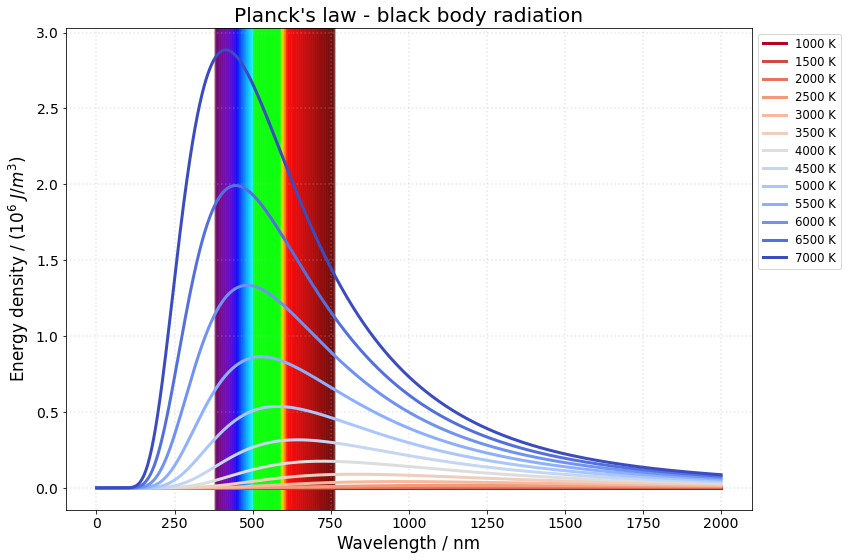

In [2]:
lambda_array = np.linspace(1.0e-9, 2.0e-6, 1000)  # wavelength range
temperature_array = np.arange(1000, 7001, 500)  # temperature range
example = Planck(lambda_array, temperature_array)
example.plot();

It is possible to change the colormap of the curves:

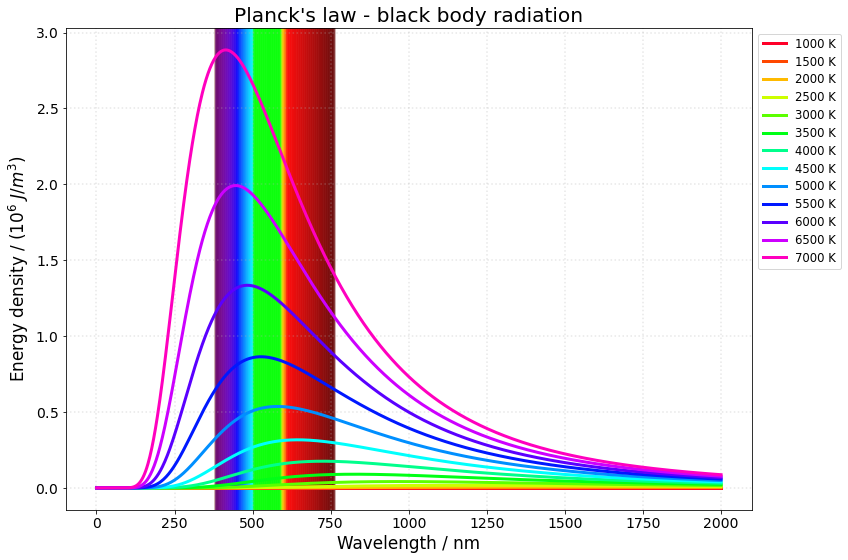

In [3]:
import matplotlib.pyplot as plt

example.plot(plt.cm.gist_rainbow);

The `transparency` parameter controls the transparency of the visible spectra behind the plot:

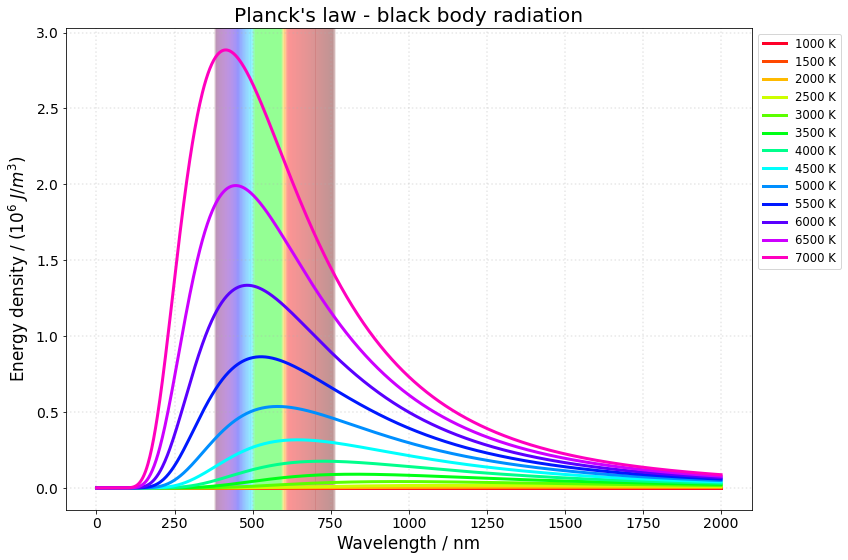

In [4]:
example.plot(plt.cm.gist_rainbow, lines=200, transparency=0.1);

It is possible to create the plot for just one temperature, passing a tuple with one value:

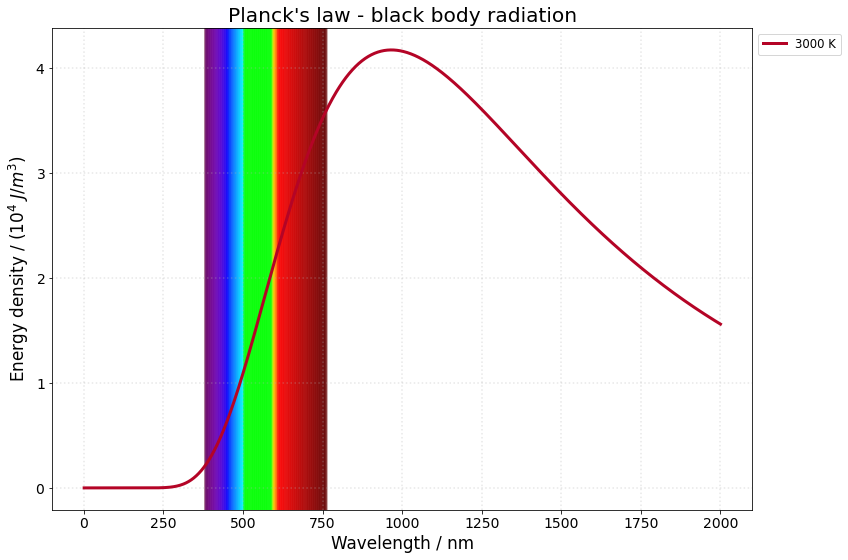

In [5]:
example_one_temperature = Planck(lambda_array, (3000,))
example_one_temperature.plot();

One can plot only the visible spectra:

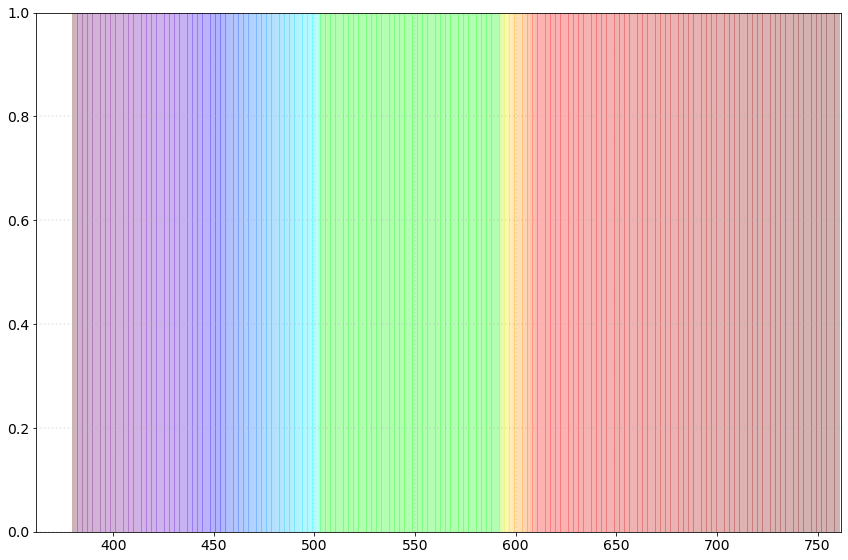

In [6]:
example.plot_visible();

Increase the amount of lines to get a better looking plot:

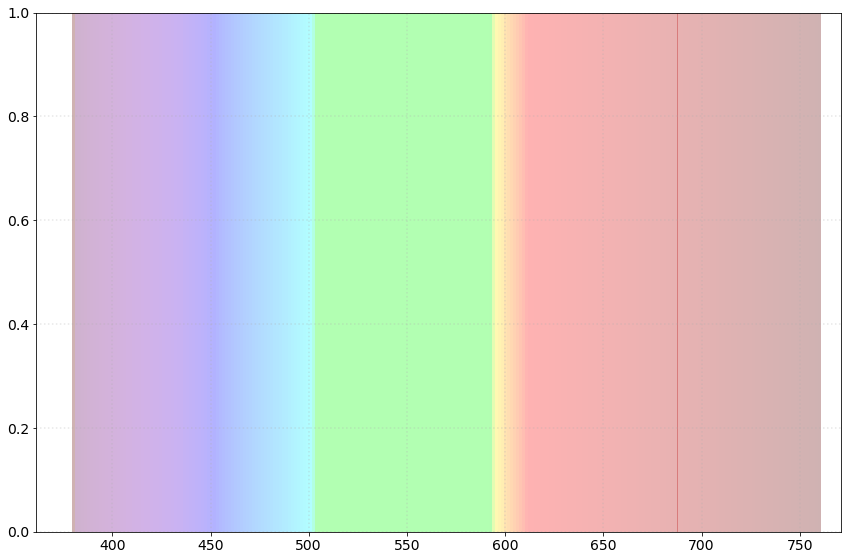

In [7]:
example.plot_visible(lines=250);

A special method `plot_interactive` is available to use with ipywidgets:

In [8]:
graph = interactive(Planck.plot_interactive,
                    wavelengths=fixed(lambda_array),
                    transparency=fixed(0.2),
                    ax=fixed(None),
                    temperature=(3000,9000,400))
display(graph)

interactive(children=(IntSlider(value=3000, description='temperature', max=9000, min=3000, step=400), Output()…

A static method is available to calculate the energy density for a given wavelength and temperature (SI unit system):

In [9]:
Planck.energy_density(350, 300)

6.937007912791788e-30

The method can be used to calculate the energy densities for an array of wavelengths at a given temperature:

In [10]:
Planck.energy_density(np.array((300e-9, 800e-9)), 3000)

array([  234.36935677, 38053.6604245 ])

To find out the classification (region, band or type) for a given wavelength (meters), there is the `spectral_categories` method:

In [11]:
Planck.spectral_categories(500E-9)

[Classification(category='Visible', subcategory='Green')]

The classification is based on the ISO 21348:2007.

The `wien_peak` method returns the wavelength (meters) of the peak of the spectral radiance distribution for a black-body at a given temperature (Kelvin):

In [12]:
Planck.wien_peak(7000)

4.1396742214285715e-07